# Testing ground for simulations

Will test the following:
- [ ] CTRNN
- [ ] Jansen-Rit model + extended
- [ ] Kuramoto model
- [ ] Wilson-Cowan model

Then will also test inter-arel models (connecting several of the above).

## CTRNN

In [4]:
from pyeeg.simulate import CTRNN, JansenRit
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('my_dark')

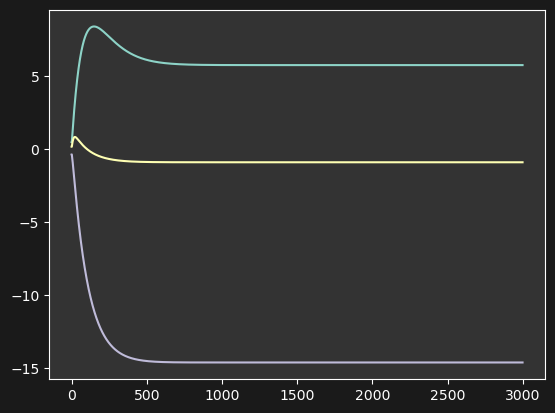

In [118]:
W = np.random.randn(3, 3)
W=[[-0., 20, 10],
   [-1, .3, 20],
   [-15, 1.2, -0.]]
model = CTRNN(3, W=W, dt=0.01)
model.readout_W = np.asarray([0.3, 0.1, 0.])
model.input_W = np.asarray([0.3, 0.1, 0.])

O, x, o = model.simulate(np.random.randn(3, ), tmax=30)
plt.plot(x)

## Jansen-Rit model

See [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10473283/) from which I followed the current implementation and parameters choice (which are themselves following [this reference](https://hal.science/inria-00592529)).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyeeg.simulate import JansenRit
from pyeeg.utils import sigmoid
plt.style.use('my_dark')

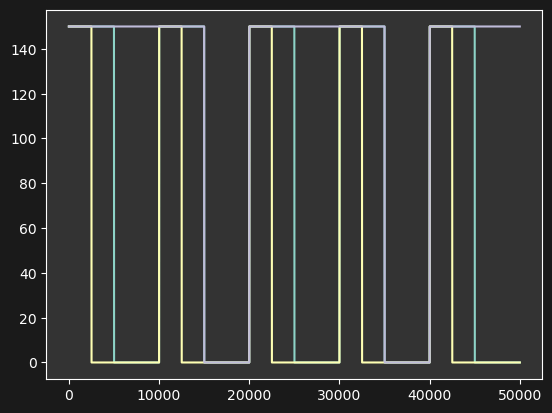

In [25]:
# Input signal: burst of activity at 150Hz for 0.5s then nothing, with interval of 1s
def input_signal(t, every=1, gate=0.5):
    return 150 * np.where((t % every) < gate, 1, 0)
plt.plot(input_signal(t, every=1, gate=0.5), label='input')
plt.plot(input_signal(t, every=1, gate=0.25), label='input')
plt.plot(input_signal(t, every=2, gate=1.5), label='input')
demean = lambda x: x - x.mean(axis=0)

Text(0.5, 0.98, 'Jansen-Rit model\nInput: Constant 150Hz rate')

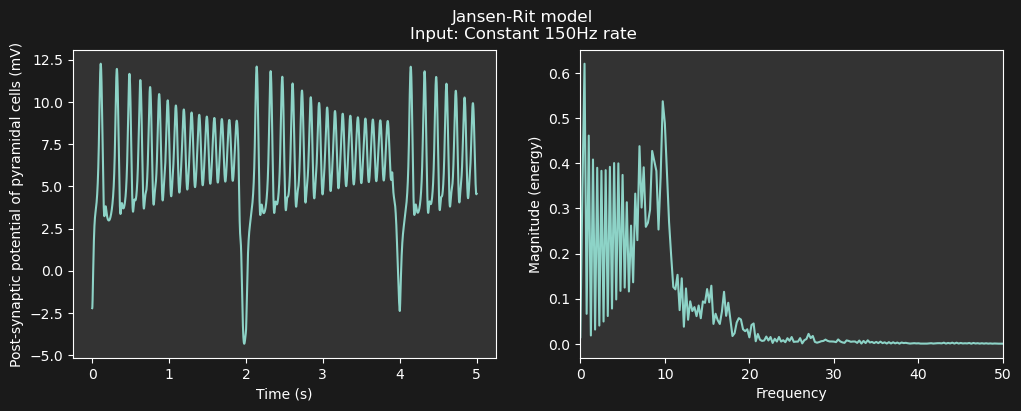

In [27]:
model = JansenRit()
tmax = 5
t = np.arange(0, 5, model.dt)
x = model.simulate(np.random.randn(6, ), tmax=tmax, noise=0.5, P=input_signal(t, every=2, gate=1.9))


f, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(t, x[:, 1] - x[:, 2])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Post-synaptic potential of pyramidal cells (mV)')
ax[1].magnitude_spectrum(demean(x[10000:, 1] - x[10000:, 2]), Fs=1/model.dt);
ax[1].set_xlim(0, 50)
f.suptitle('Jansen-Rit model\nInput: Constant 150Hz rate')